In [1]:
import numpy as np
#from scipy.integrate import solve_ivp
#from scipy.signal import spectrogram
import matplotlib.pyplot as plt
#from piaxi_numerics import set_params, solve_system, get_text_params
from piaxi_utils import fit_crude_epsilon_relation, fit_Fpi

verbosity = 9

In [2]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## TODO: Data generation, importing, and preprocessing

# TODO: load dataset
from sklearn.datasets import make_classification
X, y = make_classification(random_state = 0, n_features = 20, n_informative = 18, n_classes = 3)

# TODO: split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [3]:
# Create dataset processing and classification pipeline
model_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
model_mlp = Pipeline([('scaler', StandardScaler()), ('mlp', MLPRegressor(max_iter=400))])
models = [model_svc, model_mlp]

# Fit model to training dataset
for model in models:
    print(list(model.named_steps.keys())[1])
    model.fit(X_train, y_train)
    # Evaluate fit with test dataset
    print("Score: %.2f" % model.score(X_test, y_test))
    print(" --------------------------------------- ")

svc
Score: 0.72
 --------------------------------------- 
mlp
Score: 0.38
 --------------------------------------- 


D:\env\Python\Python38-3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


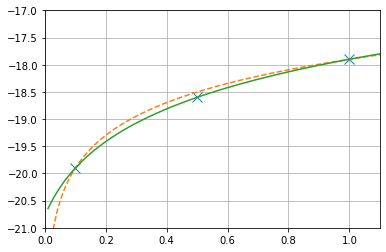

y = 2.615 log_10(10x + 0.868) + -20.610


In [4]:
fit_eps = True
eps = 1.
if fit_eps:
    pts = [(0.1,-19.9,eps), (0.5,-18.6,eps), (1,-17.9,eps)]
    fit_res, _ = fit_crude_epsilon_relation(pts_in=pts, plot_fit=True)
    if verbosity >= 0:
        print('y = %.3f log_10(10x + %.3f) + %.3f' % (fit_res[0], fit_res[1], fit_res[2]))

In [5]:
fit_F = True

if fit_F:
    Fpi = fit_Fpi(1.0, 1e-20)

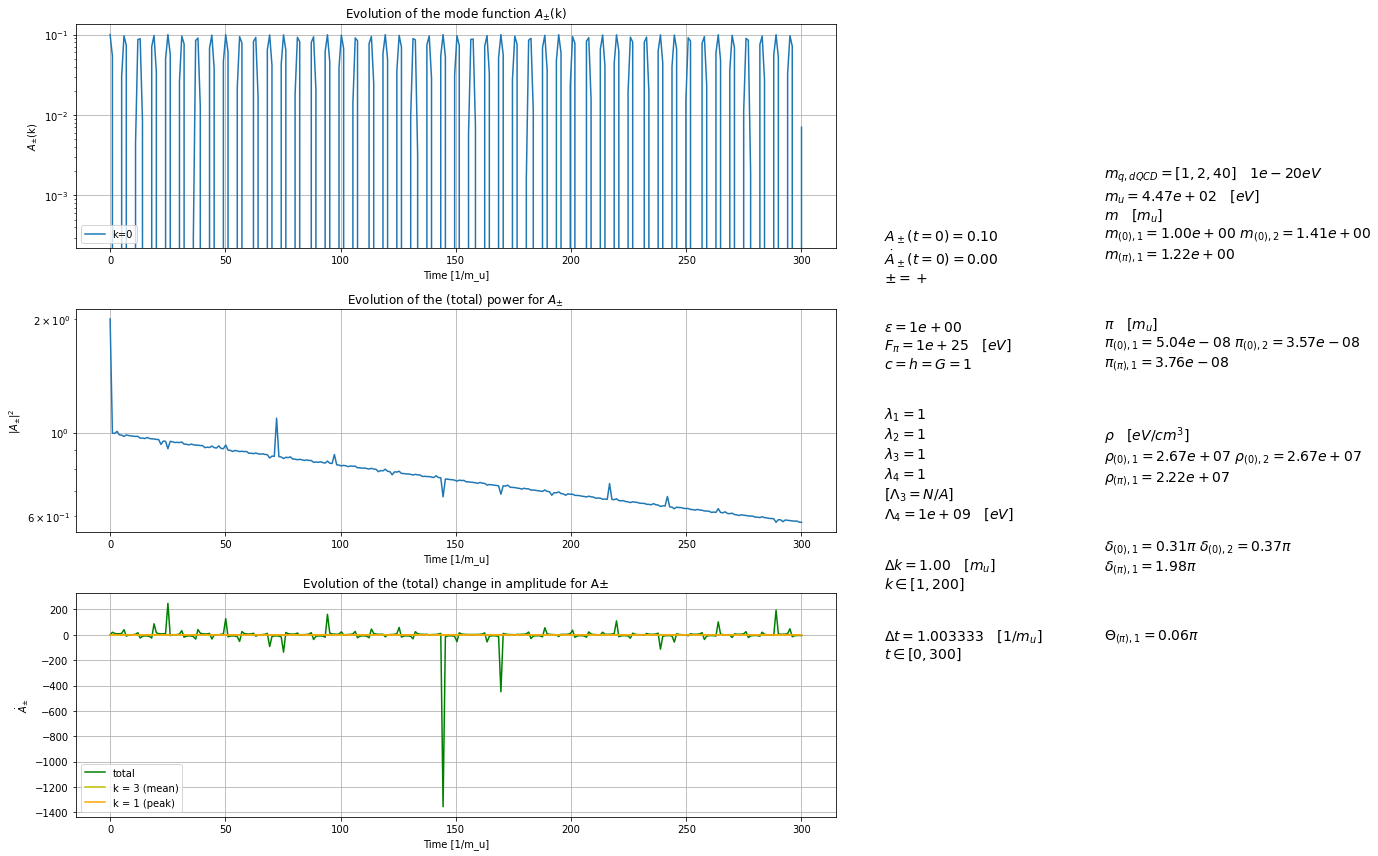

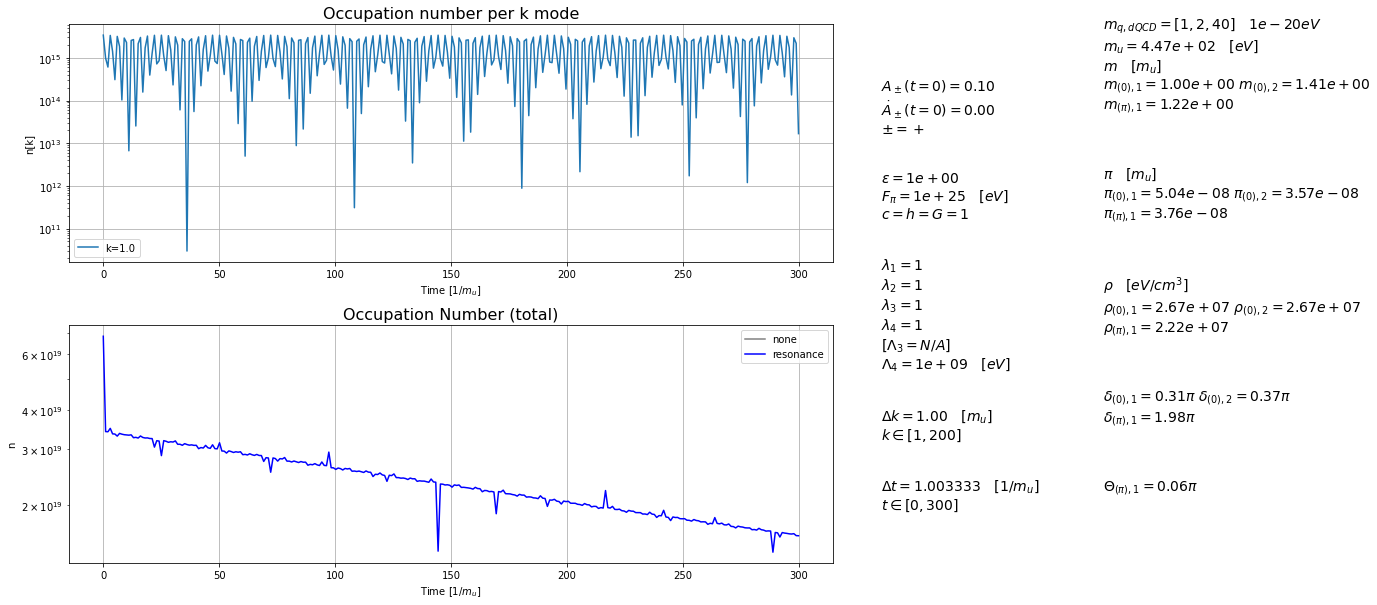

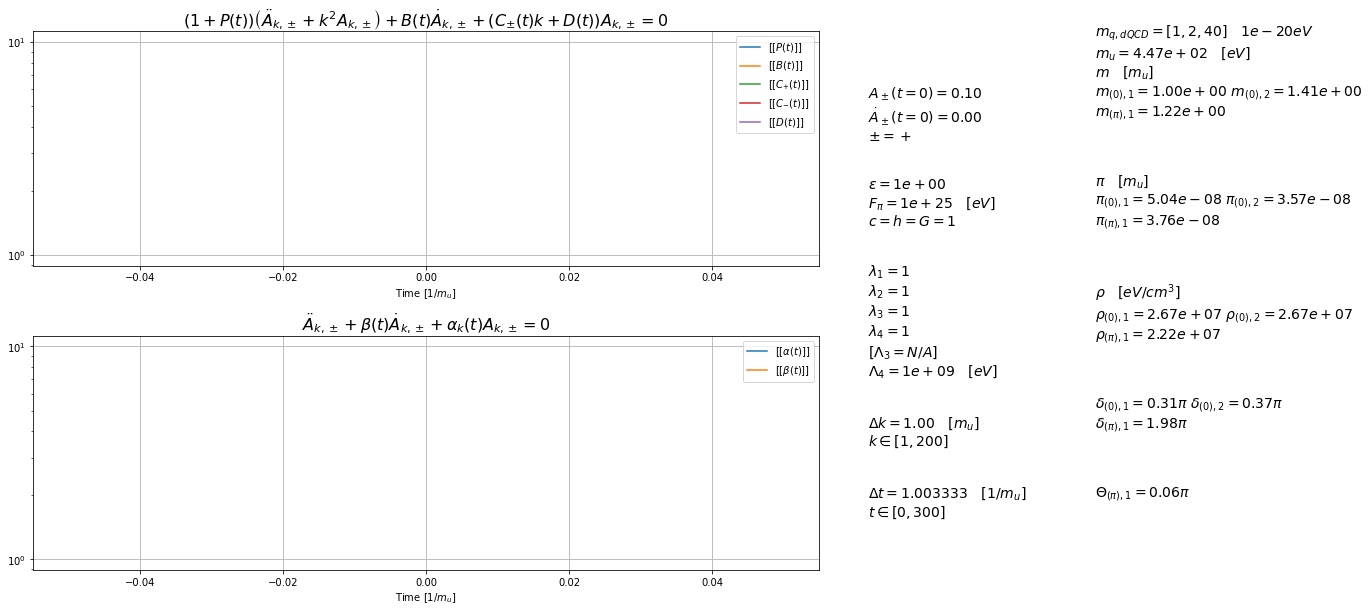

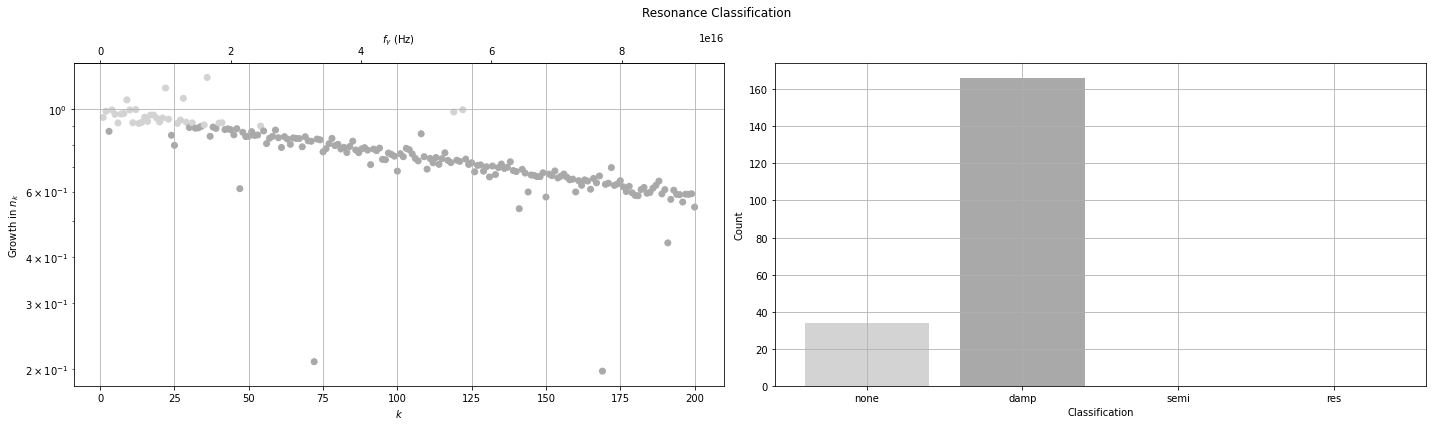

In [6]:
from piaxi_utils import plot_single_case, load_single_result

#plot_single_case('3_neutrals_5f6d4c42050e31fa8d06ce7d9fc526e1eff881f3.json', output_dir='.\\test_data\\')
plot_single_case('3_neutrals_5f6d4c42050e31fa8d06ce7d9fc526e1eff881f3.json', output_dir='./test_data/')
                 

In [7]:
## Analyze a run's plots TODO/WIP
if False:
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Sample data (replace with actual data)
    params, results, _, coeffs = load_single_result(filename='3_neutrals_5f6d4c42050e31fa8d06ce7d9fc526e1eff881f3', output_dir='./test_data/v2.8/3_neutrals/')

    # Placeholder for raw solution (replace with actual data when available)
    data = params
    raw_solution = results

    # Heatmap for raw solution
    plt.figure(figsize=(12, 8))
    sns.heatmap(raw_solution, cmap='viridis')
    plt.title("Heatmap of Raw Solution (Amplitude of Photon Field)")
    plt.xlabel("k-mode")
    plt.ylabel("Time")
    plt.show()

    # Bar plots for k_mean_arr, k_peak_arr, and k_sens_arr
    k_modes = np.arange(1, len(data["k_mean_arr"]) + 1)
    plt.figure(figsize=(12, 8))
    plt.bar(k_modes, data["k_mean_arr"], label="k_mean_arr", alpha=0.6)
    plt.bar(k_modes, data["k_peak_arr"], label="k_peak_arr", alpha=0.6)
    plt.bar(k_modes, data["k_sens_arr"], label="k_sens_arr", alpha=0.6)
    plt.xlabel("k-mode")
    plt.ylabel("Value")
    plt.title("Bar Plots for k_mean_arr, k_peak_arr, and k_sens_arr")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Categorical plot for k_class_arr
    plt.figure(figsize=(12, 8))
    sns.countplot(data["k_class_arr"])
    plt.title("Distribution of Classification Labels")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from piaxi_utils import load_all

def prepare_data(config_name, output_root='./test_data', version='v2.8'):
    """Load and prepare data for future functions"""
    
    params, results, _, coeffs = load_all(config_name, output_root, version)
    
    # Convert to DataFrames for ease of manipulation
    params_df  = pd.DataFrame(params)
    # Set dtypes for each column
    dtype_map = {
        "A_0": np.float32,
        "A_pm": np.int32,
        "A_sens": np.float32,
        "Adot_0": np.float32,
        "F": np.float32,
        "G": np.float32,
        "L3": np.float32,
        "L4": np.float32,
        "N_c": np.int32,
        "N_n": np.int32,
        "N_r": np.int32,
        "Th": np.ndarray,
        "amps": np.ndarray,
        "c": np.float32,
        "d": np.ndarray,
        "dqm": np.ndarray,
        "e": np.float32,
        "eps": np.float32,
        "eps_c": np.ndarray,
        "h": np.float32,
        "jupyter": 'Int64',
        "k_0": np.float32,
        "k_class_arr": 'object',
        "k_mean_arr": np.ndarray,
        "k_num": np.int32,
        "k_peak_arr": np.ndarray,
        "k_sens_arr": np.ndarray,
        "k_span": np.ndarray,
        "l1": np.int32,
        "l2": np.int32,
        "l3": np.int32,
        "l4": np.int32,
        "m": np.ndarray,
        "m_0": np.float32,
        "m_c": np.ndarray,
        "m_n": np.ndarray,
        "m_q": np.float32,
        "m_r": np.ndarray,
        "m_u": np.float32,
        "mu_Th": np.float32,
        "mu_d": np.float32,
        "num_cores": np.int32,
        "p": np.ndarray,
        "p_0": np.float32,
        "p_c": np.ndarray,
        "p_n": np.ndarray,
        "p_r": np.ndarray,
        "p_t": np.float32,
        "parallel": bool,
        "qc": np.ndarray,
        "qm": np.ndarray,
        #"res_band": np.ndarray,
        #"res_band_class": str,
        #"res_class": str,
        "res_con": np.float32,
        #"res_freq": 'Int64',
        #"res_freq_class": str,
        "rescale_amps": bool,
        "rescale_consts": bool,
        "rescale_k": bool,
        "rescale_m": bool,
        "seed": str,
        "sig_Th": np.float32,
        "sig_d": np.float32,
        "t_num": np.int32,
        "t_res": np.float32,
        "t_sens": np.float32,
        "t_span": np.ndarray,
        "t_u": np.float32,
        "time_elapsed": str,
        "unitful_amps": bool,
        "unitful_k": bool,
        "unitful_m": bool,
        "xi": np.ndarray
    }

    for col, dtype in dtype_map.items():
        try:
            if dtype is np.ndarray:
                params_df[col] = params_df[col].apply(np.array)
            else:
                params_df[col] = params_df[col].astype(dtype)
        except (OverflowError):
            print(col, dtype)
    
    #results_df = pd.DataFrame(results)
    #coeffs_df  = pd.DataFrame(coeffs)
    
    return params_df


def plot_heatmaps(df):
    """Plot heatmaps of k_class_arr, k_sens_arr, and k_peak_arr over multiple runs."""
    
    # Assuming the arrays are already in the correct format
    k_class_arr = df['k_class_arr']
    k_sens_arr  = df['k_sens_arr']
    k_peak_arr  = df['k_peak_arr']
    k_spans     = df['k_span']

    # Determine the global k-range
    global_k_min = min([span[0] for span in k_spans])
    global_k_max = max([span[1] for span in k_spans])
    total_k_modes = max([len(arr) for arr in k_class_arr])  # maximum number of k-modes
    
    # Convert string values to unique integers for plotting
    unique_values = np.unique(np.concatenate(k_class_arr))
    num_runs   = len(k_class_arr)
    num_values = len(k_class_arr[0])
    value_to_int = {value: idx for idx, value in enumerate(unique_values)}
    
    print(k_class_arr)
    print(k_sens_arr)
    print(k_peak_arr)
    
    #k_class_arr = [[value_to_int[val] for val in row] for row in k_class_arr]
    #k_sens_arr  = [[val for val in row] for row in k_sens_arr]
    #k_peak_arr  = [[val for val in row] for row in k_peak_arr]
    
    if True:
        # Initialize combined heatmaps
        combined_k_class = np.full((len(k_class_arr), total_k_modes), np.nan)
        combined_k_sens  = np.full((len(k_sens_arr), total_k_modes), np.nan)
        combined_k_peak  = np.full((len(k_peak_arr), total_k_modes), np.nan)

        # Fill in the combined heatmaps
        for idx, (k_class, k_sens, k_peak, k_span) in enumerate(zip(k_class_arr, k_sens_arr, k_peak_arr, k_spans)):
            start_idx = int((k_span[0] - global_k_min) * total_k_modes / (global_k_max - global_k_min))
            end_idx = start_idx + len(k_class)
            combined_k_class[idx, start_idx:end_idx] = [value_to_int[val] for val in k_class]
            combined_k_sens[idx, start_idx:end_idx] = k_sens
            combined_k_peak[idx, start_idx:end_idx] = k_peak

        # Plot the combined heatmaps
        plt.figure(figsize=(10, 12))
        plt.subplot(3, 1, 1)
        plt.imshow(combined_k_class, aspect='auto', cmap='viridis')
        plt.title("k_class_arr")

        plt.subplot(3, 1, 2)
        plt.imshow(combined_k_sens, aspect='auto', cmap='viridis')
        plt.title("k_sens_arr")

        plt.subplot(3, 1, 3)
        plt.imshow(combined_k_peak, aspect='auto', cmap='viridis')
        plt.title("k_peak_arr")

        plt.tight_layout()
        plt.show()
        
    else:
        fig, axs = plt.subplots(3, 1, figsize=(10, 15))

        im1 = axs[0].imshow(k_class_arr, aspect='auto', cmap='viridis')
        axs[0].set_title('k_class_arr heatmap')
        axs[0].set_xlabel('Index')
        axs[0].set_ylabel('Run')

        im2 = axs[1].imshow(k_sens_arr, aspect='auto', cmap='viridis')
        axs[1].set_title('k_sens_arr heatmap')
        axs[1].set_xlabel('Index')
        axs[1].set_ylabel('Run')

        im3 = axs[2].imshow(k_peak_arr, aspect='auto', cmap='viridis')
        axs[2].set_title('k_peak_arr heatmap')
        axs[2].set_xlabel('Index')
        axs[2].set_ylabel('Run')

        # Add colorbars to indicate the mapping from integers back to string values
        cbar1 = plt.colorbar(im1, ax=axs[0], ticks=list(value_to_int.values()))
        cbar1.set_ticklabels(list(value_to_int.keys()))

        #cbar2 = plt.colorbar(im2, ax=axs[1], ticks=list(value_to_int.values()))
        #cbar2.set_ticklabels(list(value_to_int.keys()))

        #cbar3 = plt.colorbar(im3, ax=axs[2], ticks=list(value_to_int.values()))
        #cbar3.set_ticklabels(list(value_to_int.keys()))

        plt.tight_layout()
        plt.show()

def plot_scatter(df):
    """Plot m_r vs F and p_t vs Lambda4 scatter plots over multiple runs, labeled by res_class."""
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    unique_classes = df['res_class'].unique()
    
    for res_cls in unique_classes:
        subset = df[df['res_class'] == res_cls]
        
        axs[0].scatter(subset['F'], subset['m_r'].str[0], label=f'Res Class {res_cls}')
        axs[1].scatter(subset['L4'], subset['p_t'], label=f'Res Class {res_cls}')
    
    axs[0].set_title('m_r vs F')
    axs[0].set_xlabel('F')
    axs[0].set_ylabel('m_r')
    
    axs[1].set_title('p_t vs Lambda4')
    axs[1].set_xlabel('Lambda4 (L4)')
    axs[1].set_ylabel('p_t')
    
    axs[0].legend()
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()

Index(['A_0', 'A_pm', 'A_sens', 'Adot_0', 'F', 'G', 'L3', 'L4', 'N_c', 'N_n',
       'N_r', 'Th', 'amps', 'c', 'class', 'd', 'dqm', 'e', 'eps', 'eps_c', 'h',
       'jupyter', 'k_0', 'k_class_arr', 'k_mean_arr', 'k_num', 'k_peak_arr',
       'k_sens_arr', 'k_span', 'l1', 'l2', 'l3', 'l4', 'm', 'm_0', 'm_c',
       'm_n', 'm_q', 'm_r', 'm_u', 'mu_Th', 'mu_d', 'num_cores', 'p', 'p_0',
       'p_c', 'p_n', 'p_r', 'p_t', 'parallel', 'qc', 'qm', 'res_class',
       'res_con', 'rescale_amps', 'rescale_consts', 'rescale_k', 'rescale_m',
       'seed', 'sig_Th', 'sig_d', 't_num', 't_res', 't_sens', 't_span', 't_u',
       'time_elapsed', 'unitful_amps', 'unitful_k', 'unitful_m', 'xi'],
      dtype='object')
0    [none, none, damp, none, none, none, none, non...
1    [none, none, damp, none, none, none, none, non...
2    [none, none, damp, none, none, none, none, non...
Name: k_class_arr, dtype: object
0    [0.06195471, 0.06261616, 0.06041965, 0.0643871...
1    [0.06195471, 0.06261616, 0.060419

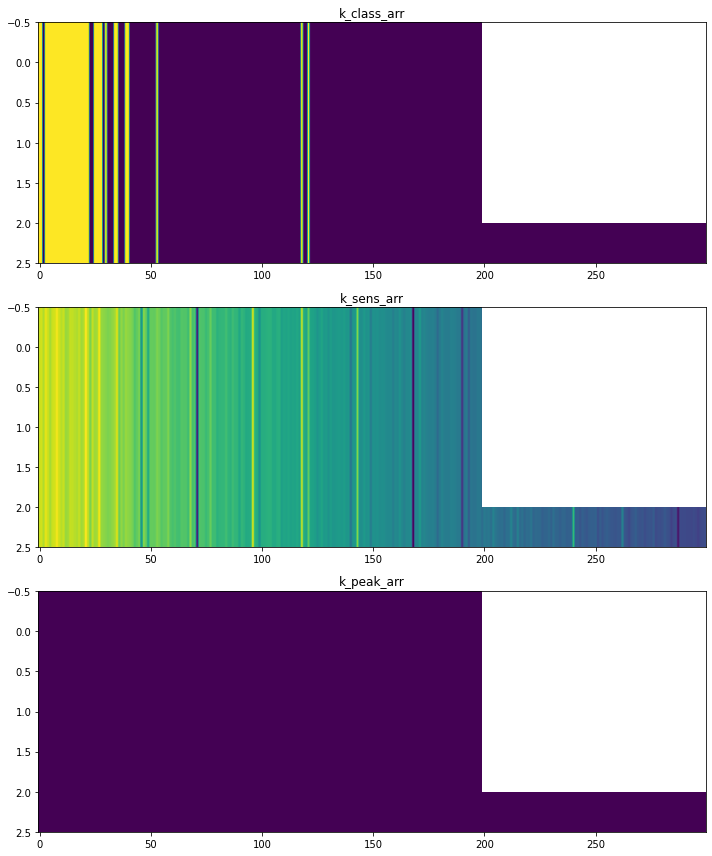

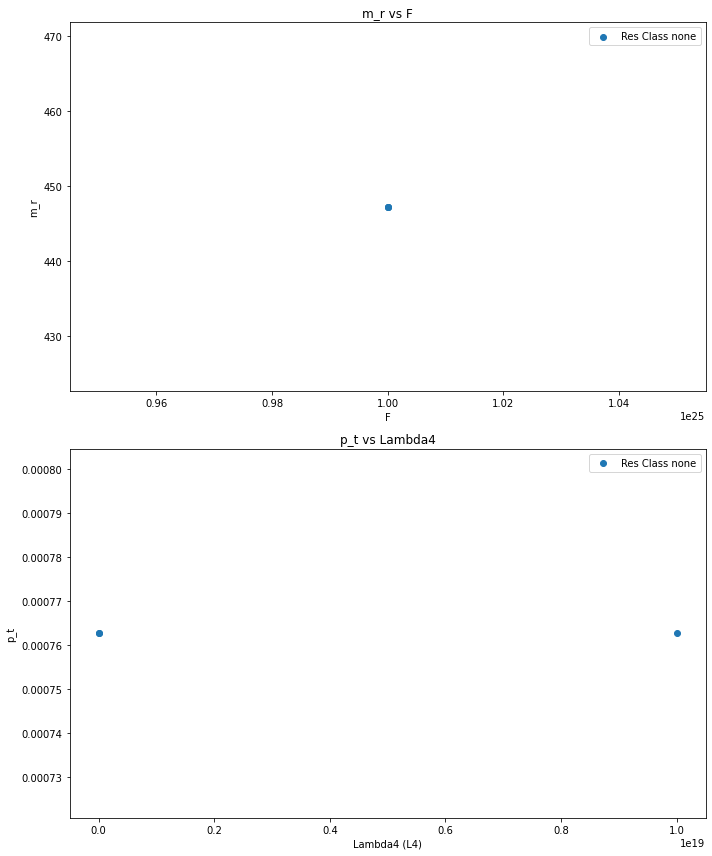

In [48]:
resdata = prepare_data('3_neutrals')
print(resdata.columns)
plot_heatmaps(resdata)
plot_scatter(resdata)